## Introduction
In this notebook, we focus on interpreting the models trained to predict Customer Lifetime Value (CLV).
While predictive performance metrics (such as R², MAE, RMSE) help us evaluate model accuracy, understanding why a model makes certain predictions is critical for actionable business insights.

We aim to:

- Identify which features have the strongest influence on predicted CLV.

- Compare feature importances across models.

- Use tools such as SHAP to provide detailed, model-agnostic explanations at both the global and individual levels.

By interpreting model behavior, we can support decision-making in areas such as customer segmentation, marketing strategy, and retention prioritization.
In this notebook, we focus on interpreting the LightGBM model, which, despite not having the top performance, provides a good balance between interpretability and predictive power. Its structure also makes it compatible with SHAP's TreeExplainer, enabling efficient explanation of predictions.


In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and feature importance tools
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# SHAP for explainability
import shap

# Optional: styling
sns.set(style="whitegrid")

# Enable SHAP visualizations in notebooks
shap.initjs()

In [3]:
import sys
import os
os.chdir("..")

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

### Load Trained Model and Data

We start by loading the trained LightGBM model and the corresponding training dataset. This will allow us to generate SHAP values and interpret both global and local effects.



In [9]:
import joblib

model = joblib.load("models/lgb_model.pkl")
X_train = joblib.load("data/X_train.pkl")

### SHAP Global Interpretation

We use SHAP's TreeExplainer to compute SHAP values for all training observations. The summary plot below shows the global impact of each feature on the model's predictions. Features are ranked by importance, and the color indicates whether a feature value is high (red) or low (blue).


 99%|===================| 3846/3866 [00:11<00:00]       

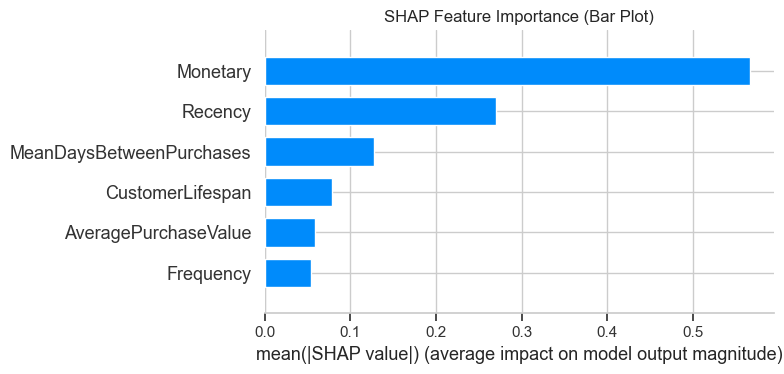

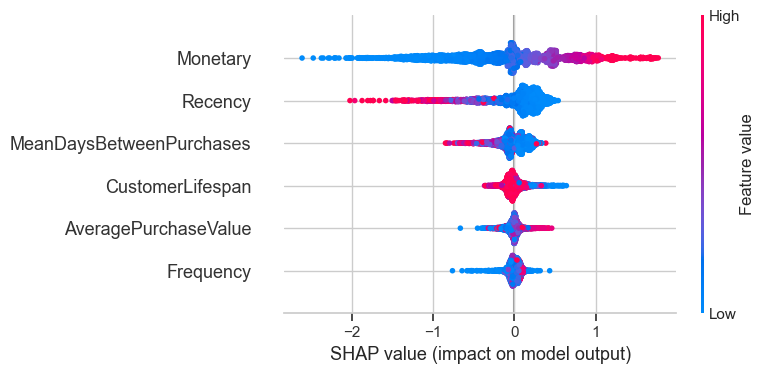

Text(0.5, 1.0, 'SHAP Summary Plot (Beeswarm)')

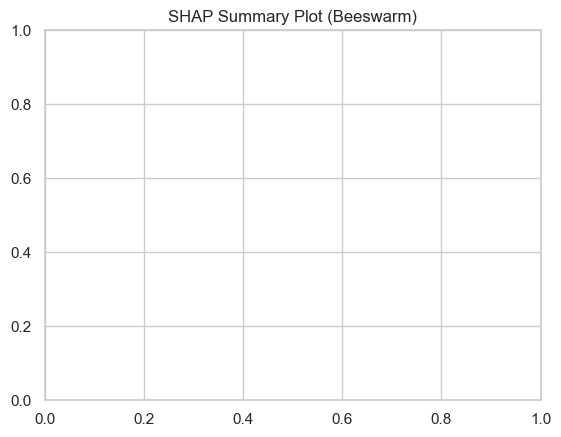

In [12]:
# SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Global interpretation — summary plot
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_train, plot_type="bar")  # importance
shap.summary_plot(shap_values, X_train)                   # beeswarm
plt.title("SHAP Summary Plot (Beeswarm)")

### Local Feature Attribution for a Single Customer

To better understand how the model arrives at a specific prediction, we analyze the SHAP values for a single observation. The waterfall plot below shows how each feature contributes to shifting the base value (model average prediction) toward the final output. Features that push the prediction higher are shown in red, while those that decrease it are in blue.


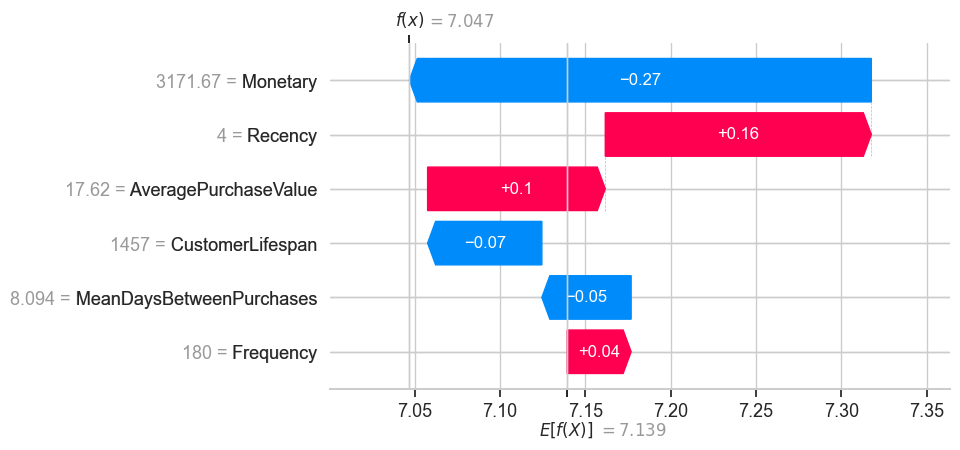

In [11]:
# Visual explanation for the first sample
shap.plots.waterfall(shap_values[0])

### Summary

SHAP-based interpretability helped confirm that monetary value and recency are the key drivers of CLV in this dataset. This not only aligns with domain intuition but also enables actionable insights for targeting valuable customers. Individual explanations can be used to understand customer-level predictions and justify model decisions.
